In [1]:


import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')
ad = pd.read_csv("Hitters.csv")
df = ad.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [2]:
df.shape


(322, 20)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [4]:
df.isnull().values.any()

True

In [5]:
df.nunique()

AtBat        247
Hits         144
HmRun         36
Runs          96
RBI          103
Walks         89
Years         22
CAtBat       314
CHits        288
CHmRun       146
CRuns        261
CRBI         262
CWalks       248
League         2
Division       2
PutOuts      232
Assists      161
Errors        29
Salary       150
NewLeague      2
dtype: int64

In [6]:
df["League"].value_counts()

A    175
N    147
Name: League, dtype: int64

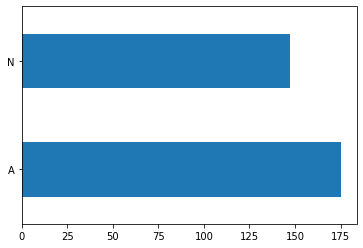

In [7]:
df.League.value_counts().plot.barh();

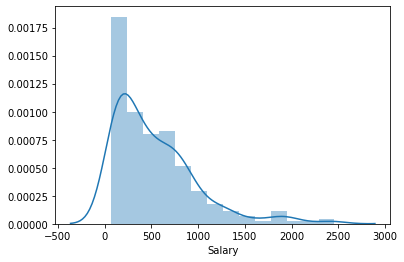

In [8]:
# Salary (Maaş) değişkeninin histogram ve yoğunluk grafiği çizdirilmiştir.
import seaborn as sns
sns.distplot(df.Salary);

In [9]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931


In [10]:
#veri on isleme
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, 
                                                    random_state=46)

**KNN**

In [648]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [649]:
knn_model.n_neighbors

5

In [650]:
y_pred = knn_model.predict(X_test)

In [651]:
np.sqrt(mean_squared_error(y_test, y_pred))

438.75715389787524

In [ ]:
#Tuned 

In [652]:
#knn_params = {'n_neighbors': np.arange(1,30,1)}

In [685]:
#knn = KNeighborsRegressor()

In [728]:
#knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train,y_train)

In [735]:
#knn_cv_model.best_params_['n_neighbors']

In [737]:
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train )
#knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train, y_train)

In [738]:
y_pred = knn_tuned.predict(X_test)
knn_final = np.sqrt(mean_squared_error(y_test, y_pred))
knn_final

505.0045840305597

**SVR**

In [739]:
svr_model = SVR().fit(X_train, y_train)

In [740]:
y_pred = svr_model.predict(X_test)
svr_base = np.sqrt(mean_squared_error(y_test, y_pred))
svr_base

507.4829849939738

In [680]:
y_pred = svr_model.predict(X_test)
svr_base = np.sqrt(mean_squared_error(y_test, y_pred))
svr_base

505.22319072462665

In [682]:
# Hiperparametre setleri hazırlanarak denenmesi işlemi gerçekleştirilmiştir.
svr_model = SVR() 

svr_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1, 10, 100, 500,1000]}

svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10, n_jobs = -1, verbose =  2).fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.0s finished


In [683]:
# En iyi hiperparametreler belirlenilmiştir.
svr_cv_model.best_params_

{'C': 1000}

In [688]:
svr_tuned = SVR(**svr_cv_model.best_params_).fit(X_train, y_train)

In [689]:
svr_tuned

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [690]:
y_pred = svr_tuned.predict(X_test)
svr_final = np.sqrt(mean_squared_error(y_test, y_pred))
svr_final

434.90979834824327

**CART**

In [741]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [742]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [743]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [744]:
cart_model = DecisionTreeRegressor(random_state = 52)

In [745]:
# Hiperparametre seti ayarlanmıştır.
cart_params = {"max_depth": [2,3,4,5,10,20,100, 1000],
              "min_samples_split": [2,10,5,30,50,10]}

In [746]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10, n_jobs = -1, verbose =  2).fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    4.8s finished


In [747]:
# En iyi parametreler belirlenilmiştir.
cart_cv_model.best_params_

{'max_depth': 3, 'min_samples_split': 50}

In [748]:
cart_tuned = DecisionTreeRegressor(**cart_cv_model.best_params_).fit(X_train, y_train)

In [749]:
y_pred = cart_tuned.predict(X_test)
cart_final = np.sqrt(mean_squared_error(y_test, y_pred))
cart_final

508.1723805416302

**RANDOM FORESTS**

In [750]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [768]:
#Test hatasi
y_pred = rf_model.predict(X_test)
rf_base = np.sqrt(mean_squared_error(y_test, y_pred))
rf_base

558.8512199716419

In [754]:
# Hiperparametre seti ayarlanması
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [769]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
rf_cv_model.best_params_

In [ ]:
#final kurulum
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)
rf_final = np.sqrt(mean_squared_error(y_test, y_pred))
rf_final

**GBM**

In [764]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [765]:
y_pred = gbm_model.predict(X_test)
gbm_base = np.sqrt(mean_squared_error(y_test, y_pred))
gbm_base

524.5809091706994

In [766]:
# Hiperparametre setinin belirlenmesi
gbm_params = {"learning_rate": [0.001,0.1,0.01, 0.05],
             "max_depth": [3,5,8,9,10],
             "n_estimators": [200,500,1000,1500],
             "subsample": [1,0.4,0.5,0.7],
             "loss": ["ls","lad","quantile"]}

In [761]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [763]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 10, 
                            n_jobs=-1, 
                            verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.0min


KeyboardInterrupt: 

In [ ]:
gbm_cv_model.best_params_

In [ ]:
gbm_tuned = GradientBoostingRegressor(**gbm_cv_model.best_params_).fit(X_train, y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
gbm_final = np.sqrt(mean_squared_error(y_test, y_pred))
gbm_final

**Light GBM**

In [12]:
from lightgbm import LGBMRegressor

In [13]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [14]:
#tahmin

In [15]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [16]:
np.sqrt(mean_squared_error(y_test, y_pred))

387.914002470514

**CATBOOST**

In [ ]:
!pip install catboost

In [17]:
from catboost import CatBoostRegressor

In [18]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.029563
0:	learn: 427.5208090	total: 67.4ms	remaining: 1m 7s
1:	learn: 422.2201754	total: 70.3ms	remaining: 35.1s
2:	learn: 416.2330033	total: 73.1ms	remaining: 24.3s
3:	learn: 410.0410158	total: 76.1ms	remaining: 18.9s
4:	learn: 404.0226836	total: 78.8ms	remaining: 15.7s
5:	learn: 399.3462910	total: 81.6ms	remaining: 13.5s
6:	learn: 394.3527752	total: 84.5ms	remaining: 12s
7:	learn: 388.5335052	total: 87.3ms	remaining: 10.8s
8:	learn: 383.2476419	total: 90.2ms	remaining: 9.93s
9:	learn: 378.3382577	total: 93ms	remaining: 9.2s
10:	learn: 373.3526027	total: 95.9ms	remaining: 8.62s
11:	learn: 368.9807497	total: 98.7ms	remaining: 8.13s
12:	learn: 363.9065940	total: 102ms	remaining: 7.71s
13:	learn: 359.6584620	total: 104ms	remaining: 7.35s
14:	learn: 355.3460045	total: 107ms	remaining: 7.04s
15:	learn: 351.1766425	total: 110ms	remaining: 6.76s
16:	learn: 346.5461369	total: 113ms	remaining: 6.51s
17:	learn: 342.3915085	total: 115ms	remaining: 6.3s
18:	learn: 338.36630

In [20]:
#test
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

370.0088403479506

In [21]:
#Tuning

In [23]:

catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [24]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 13.3min


In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
#XGboost

In [ ]:


import xgboost as xgb

DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

from xgboost import XGBRegressor

xgb_model = XGBRegressor().fit(X

In [ ]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
#Tuning

In [ ]:

xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [ ]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

In [ ]:
xgb_cv.best_params_

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))